In [1]:
from google.colab import files 
import pandas as pd 
import io 


uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [73]:
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))

In [74]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Checking the information of the dataset

In [76]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Showing the number the missing values in each column

In [78]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

Droping all missing values

# Q.1) For 'House of Cards', what is the Show id and who ise the Director of this show?

In [79]:
df[df['title'].isin(["House of Cards"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# Q.2) In which year the highest number of TV Shows and Movies were released? Show it in Bar Graph

In [80]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Checking the data type of each column

In [81]:
df['Date_N'] = pd.to_datetime(df["date_added"])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01


Creating new colummn Date_N which is converted from date_added

In [82]:
df["Date_N"].dt.year.value_counts()

2019    1337
2020    1229
2018    1114
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: Date_N, dtype: int64

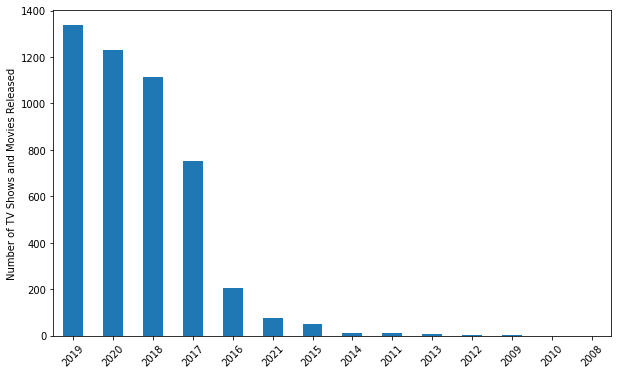

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df["Date_N"].dt.year.value_counts().plot(kind='bar')
plt.ylabel('Number of TV Shows and Movies Released')
plt.xticks(rotation=45)
plt.show()

2019 has the most movies and tv shows released

# Q.3) How many TV Shows and Movies in the dataset? Showing it in Bar Graph

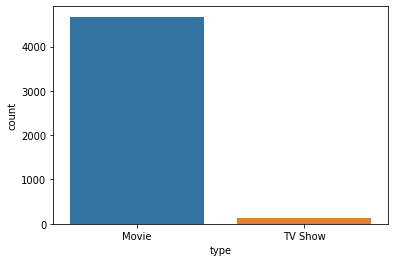

In [84]:
import seaborn as sns
sns.countplot(x="type", data=df)

# Q.4) Showing the dataset with TV Shows and Movies only in Indonesia

In [85]:
df[df["country"] == 'Indonesia']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
21,s32,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ...",2020-05-21
22,s33,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...,2020-06-28
39,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m...",2021-01-07
67,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,"January 5, 2019",2016,TV-PG,124 min,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2019-01-05
86,s124,Movie,5CM,Rizal Mantovani,"Herjunot Ali, Raline Shah, Fedi Nuril, Pevita ...",Indonesia,"September 28, 2018",2012,TV-14,126 min,"Dramas, International Movies",Five friends embark on a mission to climb the ...,2018-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,s7148,Movie,Too Handsome to Handle,Sabrina Rochelle Kalangie,"Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...",Indonesia,"December 31, 2020",2019,TV-14,106 min,"Comedies, Dramas, International Movies",Wary of the effects of his good looks on other...,2020-12-31
4588,s7408,Movie,Verses of Love,Hanung Bramantyo,"Fedi Nuril, Rianti Cartwright, Carissa Putri, ...",Indonesia,"March 27, 2019",2008,TV-PG,126 min,"Dramas, International Movies, Romantic Movies","Polygamy, piety and personal principles collid...",2019-03-27
4589,s7409,Movie,Verses of Love 2,Guntur Soeharjanto,"Fedi Nuril, Tatjana Saphira, Dewi Sandra, Chel...",Indonesia,"October 18, 2019",2017,TV-14,127 min,"Dramas, Faith & Spirituality, International Mo...","Now a lecturer in Edinburgh, Fahri tries to be...",2019-10-18
4686,s7573,Movie,What's Up With Love?,"Rudy Soedjarwo, Riri Riza","Dian Sastrowardoyo, Nicholas Saputra, Ladya Ch...",Indonesia,"December 8, 2018",2002,R,110 min,"Dramas, International Movies, Romantic Movies",A popular high school girl strains her relatio...,2018-12-08


# Q.5) Show Top 5 Directors who gave the highest number of TV Shows and Movies to Netflix

In [86]:
df.director.value_counts().head(5)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

# Q.6) How many TV shows/movies Tom Cruise was cast?

In [87]:
df[df["cast"].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
2412,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",1999,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01
3151,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",1988,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01


# Q.7) What movies/tv shows get G rating?

In [88]:
df[df["rating"] == 'G']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
108,s156,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"April 14, 2020",2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2020-04-14
158,s228,Movie,A Shaun the Sheep Movie: Farmageddon,"Richard Phelan, Will Becher","Justin Fletcher, John Sparkes, Amalia Vitale, ...","United Kingdom, France, Belgium, United States...","February 14, 2020",2020,G,87 min,"Children & Family Movies, Comedies",Shaun and the flock race to help an adorable a...,2020-02-14
282,s409,Movie,All Dogs Go to Heaven,"Don Bluth, Gary Goldman, Dan Kuenster","Dom DeLuise, Burt Reynolds, Daryl Gilley, Cand...","Ireland, United Kingdom, United States","June 1, 2020",1989,G,85 min,Children & Family Movies,"When a canine con artist becomes an angel, he ...",2020-06-01
332,s486,Movie,An American Tail,Don Bluth,"Erica Yohn, Nehemiah Persoff, Amy Green, Phill...",United States,"April 1, 2018",1986,G,80 min,Children & Family Movies,"Fievel, a young Russian mouse, immigrates to A...",2018-04-01
333,s487,Movie,An American Tail: Fievel Goes West,"Phil Nibbelink, Simon Wells","Philip Glasser, James Stewart, Erica Yohn, Cat...",United States,"April 1, 2018",1991,G,75 min,Children & Family Movies,Fievel and his family head west for what turns...,2018-04-01
334,s488,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,"April 1, 2018",1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...,2018-04-01
335,s489,Movie,An American Tail: The Treasures of Manhattan I...,Larry Latham,"Thomas Dekker, Dom DeLuise, Pat Musick, Nehemi...",United States,"April 1, 2018",2000,G,79 min,Children & Family Movies,When Fievel and friends go hunting for buried ...,2018-04-01
479,s709,Movie,Balto,Simon Wells,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",United States,"April 1, 2018",1995,G,78 min,"Children & Family Movies, Dramas","Balto, who is half wolf and half dog, endures ...",2018-04-01
480,s710,Movie,Balto 2: Wolf Quest,Phil Weinstein,"Maurice LaMarche, Jodi Benson, Lacey Chabert, ...",United States,"April 1, 2018",2001,G,75 min,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",2018-04-01
481,s711,Movie,Balto 3: Wings of Change,Phil Weinstein,"Maurice LaMarche, Sean Astin, Keith Carradine,...",United States,"April 1, 2018",2004,G,78 min,Children & Family Movies,A pilot challenges Balto's son Kodi and his sl...,2018-04-01


# Q.8) Which country has the highest nummber of tv shows and movies in the dataset?

In [91]:
df["country"].value_counts().head(3)

United States     1653
India              832
United Kingdom     174
Name: country, dtype: int64

United States is country with the most movies and tv shows included in the dataset